<a href="https://colab.research.google.com/github/tamara-kostova/IIS/blob/master/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing packages and importing libraries

In [47]:
!pip install torch==2.1.0
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
Looking in links: https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
Looking in links: https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
Looking in links: https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html


In [48]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from torch_geometric.nn.models import Node2Vec
from torch_geometric.datasets import Actor
from tqdm import tqdm
from torch.optim import SparseAdam
from torch_geometric.nn import Linear, SAGEConv
from torch.nn.functional import dropout
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
import torch

# **EXERCISE 1**

Function for training the model

In [49]:
def train_node_embeddings(model, epochs=5, batch_size=32, lr=0.001, device='cpu'):
    model = model.to(device)

    loader = model.loader(batch_size=batch_size, shuffle=True, num_workers=0)

    optimizer = SparseAdam(list(model.parameters()), lr=lr)

    model.train()

    for epoch in range(epochs):
        train_loss = 0

        for pos_rw, neg_rw in tqdm(loader):
            optimizer.zero_grad()

            loss = model.loss(pos_rw.to(device), neg_rw.to(device))
            loss.backward()

            optimizer.step()

            train_loss += loss.item()

        train_loss = train_loss / len(loader)

        print(f'Epoch: {epoch:02d}, Loss: {train_loss:.4f}')

In [50]:
data = Actor('../data')
dataset = data[0]

Node2Vec model

In [51]:
model = Node2Vec(dataset.edge_index,
                     embedding_dim=50,
                     walk_length=30,
                     context_size=10,
                     walks_per_node=20,
                     num_negative_samples=1,
                     p=200, q=1,
                     sparse=True)
train_node_embeddings(model, epochs=50)

100%|██████████| 238/238 [01:47<00:00,  2.22it/s]


Epoch: 00, Loss: 4.3488


100%|██████████| 238/238 [01:27<00:00,  2.71it/s]


Epoch: 01, Loss: 3.4142


100%|██████████| 238/238 [01:28<00:00,  2.68it/s]


Epoch: 02, Loss: 2.7758


100%|██████████| 238/238 [01:29<00:00,  2.66it/s]


Epoch: 03, Loss: 2.2877


100%|██████████| 238/238 [01:30<00:00,  2.63it/s]


Epoch: 04, Loss: 1.9323


100%|██████████| 238/238 [01:30<00:00,  2.62it/s]


Epoch: 05, Loss: 1.6759


100%|██████████| 238/238 [01:29<00:00,  2.67it/s]


Epoch: 06, Loss: 1.4858


100%|██████████| 238/238 [01:19<00:00,  3.01it/s]


Epoch: 07, Loss: 1.3399


100%|██████████| 238/238 [01:23<00:00,  2.84it/s]


Epoch: 08, Loss: 1.2268


100%|██████████| 238/238 [01:28<00:00,  2.69it/s]


Epoch: 09, Loss: 1.1394


100%|██████████| 238/238 [01:28<00:00,  2.68it/s]


Epoch: 10, Loss: 1.0721


100%|██████████| 238/238 [01:28<00:00,  2.70it/s]


Epoch: 11, Loss: 1.0204


100%|██████████| 238/238 [01:28<00:00,  2.69it/s]


Epoch: 12, Loss: 0.9799


100%|██████████| 238/238 [01:27<00:00,  2.72it/s]


Epoch: 13, Loss: 0.9488


100%|██████████| 238/238 [01:28<00:00,  2.69it/s]


Epoch: 14, Loss: 0.9246


100%|██████████| 238/238 [01:27<00:00,  2.73it/s]


Epoch: 15, Loss: 0.9057


100%|██████████| 238/238 [01:27<00:00,  2.73it/s]


Epoch: 16, Loss: 0.8904


100%|██████████| 238/238 [01:28<00:00,  2.68it/s]


Epoch: 17, Loss: 0.8787


100%|██████████| 238/238 [01:26<00:00,  2.76it/s]


Epoch: 18, Loss: 0.8688


100%|██████████| 238/238 [01:28<00:00,  2.70it/s]


Epoch: 19, Loss: 0.8608


100%|██████████| 238/238 [01:27<00:00,  2.73it/s]


Epoch: 20, Loss: 0.8543


100%|██████████| 238/238 [01:31<00:00,  2.61it/s]


Epoch: 21, Loss: 0.8485


100%|██████████| 238/238 [01:30<00:00,  2.64it/s]


Epoch: 22, Loss: 0.8443


100%|██████████| 238/238 [01:33<00:00,  2.54it/s]


Epoch: 23, Loss: 0.8399


100%|██████████| 238/238 [01:29<00:00,  2.67it/s]


Epoch: 24, Loss: 0.8374


100%|██████████| 238/238 [01:28<00:00,  2.70it/s]


Epoch: 25, Loss: 0.8346


100%|██████████| 238/238 [01:29<00:00,  2.65it/s]


Epoch: 26, Loss: 0.8322


100%|██████████| 238/238 [01:27<00:00,  2.73it/s]


Epoch: 27, Loss: 0.8295


100%|██████████| 238/238 [01:30<00:00,  2.64it/s]


Epoch: 28, Loss: 0.8280


100%|██████████| 238/238 [01:30<00:00,  2.63it/s]


Epoch: 29, Loss: 0.8264


100%|██████████| 238/238 [01:27<00:00,  2.71it/s]


Epoch: 30, Loss: 0.8246


100%|██████████| 238/238 [01:31<00:00,  2.59it/s]


Epoch: 31, Loss: 0.8232


100%|██████████| 238/238 [01:32<00:00,  2.58it/s]


Epoch: 32, Loss: 0.8221


100%|██████████| 238/238 [01:32<00:00,  2.56it/s]


Epoch: 33, Loss: 0.8209


100%|██████████| 238/238 [01:27<00:00,  2.71it/s]


Epoch: 34, Loss: 0.8202


100%|██████████| 238/238 [01:28<00:00,  2.68it/s]


Epoch: 35, Loss: 0.8192


100%|██████████| 238/238 [01:29<00:00,  2.66it/s]


Epoch: 36, Loss: 0.8184


100%|██████████| 238/238 [01:28<00:00,  2.68it/s]


Epoch: 37, Loss: 0.8179


100%|██████████| 238/238 [01:28<00:00,  2.69it/s]


Epoch: 38, Loss: 0.8168


100%|██████████| 238/238 [01:22<00:00,  2.88it/s]


Epoch: 39, Loss: 0.8167


100%|██████████| 238/238 [01:29<00:00,  2.65it/s]


Epoch: 40, Loss: 0.8157


100%|██████████| 238/238 [01:26<00:00,  2.76it/s]


Epoch: 41, Loss: 0.8151


100%|██████████| 238/238 [01:29<00:00,  2.66it/s]


Epoch: 42, Loss: 0.8150


100%|██████████| 238/238 [01:27<00:00,  2.72it/s]


Epoch: 43, Loss: 0.8143


100%|██████████| 238/238 [01:28<00:00,  2.69it/s]


Epoch: 44, Loss: 0.8138


100%|██████████| 238/238 [01:31<00:00,  2.61it/s]


Epoch: 45, Loss: 0.8138


100%|██████████| 238/238 [01:26<00:00,  2.77it/s]


Epoch: 46, Loss: 0.8129


100%|██████████| 238/238 [01:26<00:00,  2.74it/s]


Epoch: 47, Loss: 0.8130


100%|██████████| 238/238 [01:26<00:00,  2.74it/s]


Epoch: 48, Loss: 0.8127


100%|██████████| 238/238 [01:27<00:00,  2.72it/s]

Epoch: 49, Loss: 0.8126


Split the dataset

In [52]:
labels = dataset.y.detach().cpu().numpy()
node_embeddings = model().detach().cpu().numpy()

train_x, test_x, train_y, test_y = train_test_split(node_embeddings, labels, test_size=0.15, stratify=labels)

Train a Random Forest Classifier

In [53]:
classifier = RandomForestClassifier(n_estimators=75)
classifier.fit(train_x, train_y)

preds = classifier.predict(test_x)

**Node embeddings** Results

In [54]:
print('Node embeddings results:')
print(f'Accuracy: {accuracy_score(preds, test_y)}')
print(f'Precision: {precision_score(preds, test_y, average="micro")}')
print(f'Recall: {recall_score(preds, test_y, average="micro")}')
print(f'F1 score: {f1_score(preds, test_y, average="micro")}')

Node embeddings results:
Accuracy: 0.22807017543859648
Precision: 0.22807017543859648
Recall: 0.22807017543859648
F1 score: 0.22807017543859648


Visualization

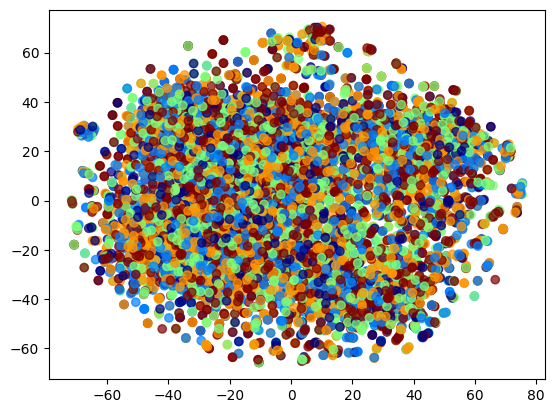

In [55]:
tsne = TSNE(n_components=2)
node_embeddings_2d = tsne.fit_transform(node_embeddings)

plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1],
            c=labels, cmap='jet', alpha=0.7)

plt.show()

# **EXERCISE 2**

Graph Convolutional Network Model

In [56]:
class GCN(torch.nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.conv1 = SAGEConv((-1, -1), 128)
        self.conv2 = SAGEConv((-1, -1), 256)

        self.linear1 = Linear(256, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).tanh()
        x = dropout(x, p=0.4)

        x = self.conv2(x, edge_index).tanh()
        x = dropout(x, p=0.4)

        x = self.linear1(x)

        return x

Accuracy function that converts outputs to probabilities using softmax and gets the predicted class by finding the max probability index

In [57]:
import torch
import torch.nn.functional as F

def accuracy(output, labels):
    with torch.no_grad():
        probabilities = F.softmax(output, dim=1)
        _, preds = torch.max(probabilities, dim=1)
        correct = preds.eq(labels).double()
        correct = correct.sum()
    return correct / len(labels)

Function for training GCN model

In [58]:
def train_gcn(model, dataset, optimizer, criterion, epochs=5):
    if len(dataset.train_mask.shape) > 1:
        train_mask = dataset.train_mask[:, 0]
    else:
        train_mask = dataset.train_mask

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        out = model(dataset.x, dataset.edge_index)
        loss = criterion(out[train_mask],
                         dataset.y[train_mask])
        loss.backward()
        optimizer.step()

        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')


In [59]:
model2 = GCN(num_classes=5)

optimizer = Adam(model2.parameters(), lr=0.01)

criterion = CrossEntropyLoss()

Visualization before training

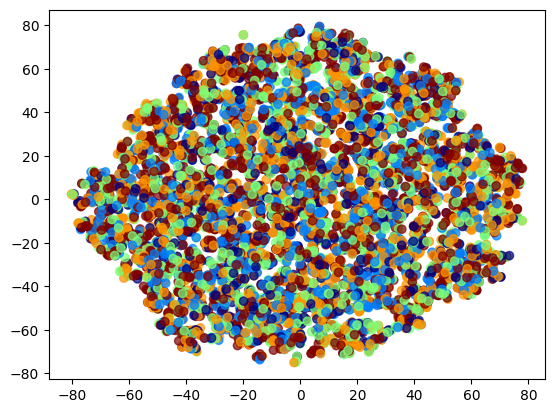

In [60]:
node_embeddings_gcn = model2(dataset.x, dataset.edge_index).detach().cpu().numpy()
tsne = TSNE(n_components=2)
node_embeddings_gcn_2d = tsne.fit_transform(node_embeddings_gcn)

plt.scatter(node_embeddings_gcn_2d[:, 0], node_embeddings_gcn_2d[:, 1],
            c=labels, cmap='jet', alpha=0.7)

plt.show()

Training the model

In [64]:
train_gcn(model2, dataset, optimizer, criterion, 1000)

Epoch: 000, Loss: 0.0830
Epoch: 001, Loss: 0.0772
Epoch: 002, Loss: 0.0804
Epoch: 003, Loss: 0.0820
Epoch: 004, Loss: 0.0800
Epoch: 005, Loss: 0.0780
Epoch: 006, Loss: 0.0751
Epoch: 007, Loss: 0.0756
Epoch: 008, Loss: 0.0791
Epoch: 009, Loss: 0.0769
Epoch: 010, Loss: 0.0811
Epoch: 011, Loss: 0.0752
Epoch: 012, Loss: 0.0787
Epoch: 013, Loss: 0.0814
Epoch: 014, Loss: 0.0804
Epoch: 015, Loss: 0.0854
Epoch: 016, Loss: 0.0759
Epoch: 017, Loss: 0.0798
Epoch: 018, Loss: 0.0751
Epoch: 019, Loss: 0.0770
Epoch: 020, Loss: 0.0794
Epoch: 021, Loss: 0.0852
Epoch: 022, Loss: 0.0791
Epoch: 023, Loss: 0.0778
Epoch: 024, Loss: 0.0789
Epoch: 025, Loss: 0.0726
Epoch: 026, Loss: 0.0761
Epoch: 027, Loss: 0.0762
Epoch: 028, Loss: 0.0721
Epoch: 029, Loss: 0.0762
Epoch: 030, Loss: 0.0811
Epoch: 031, Loss: 0.0755
Epoch: 032, Loss: 0.0778
Epoch: 033, Loss: 0.0730
Epoch: 034, Loss: 0.0730
Epoch: 035, Loss: 0.0801
Epoch: 036, Loss: 0.0833
Epoch: 037, Loss: 0.0750
Epoch: 038, Loss: 0.0784
Epoch: 039, Loss: 0.0815


**GCN** Results

In [78]:
model2.eval()
with torch.no_grad():
    out = model2(dataset.x, dataset.edge_index)
    test_acc = accuracy(out[dataset.test_mask[:, 0]], dataset.y[dataset.test_mask[:, 0]])
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.2947


Visualization after training

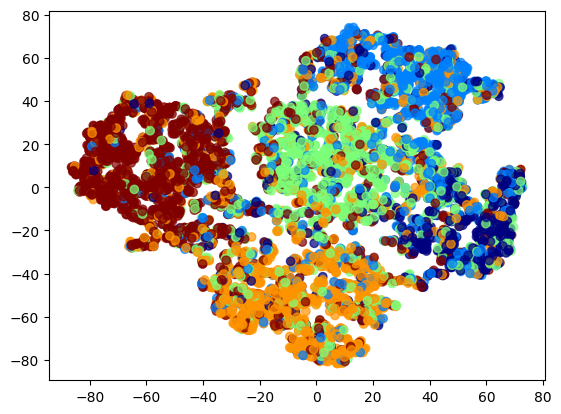

In [63]:
node_embeddings_gcn = model2(dataset.x, dataset.edge_index).detach().cpu().numpy()



tsne = TSNE(n_components=2)
node_embeddings_gcn_2d = tsne.fit_transform(node_embeddings_gcn)

plt.scatter(node_embeddings_gcn_2d[:, 0], node_embeddings_gcn_2d[:, 1],
            c=labels, cmap='jet', alpha=0.7)

plt.show()